In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Cargar los datos
df = pd.read_csv(
    'https://raw.githubusercontent.com/Haroldgio28/Probabilidad_de_impago/main/data/case%202/Churn%20Modeling.csv'
    )
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9751,9752,15789339,Yen,681,France,Male,59,4,122781.51,1,0,1,140166.95,0
8463,8464,15661162,Akabueze,526,Spain,Male,49,2,0.00,1,1,0,114539.67,1
8143,8144,15609058,Wan,676,France,Male,23,1,107787.47,1,0,1,116378.82,0
25,26,15738191,Maclean,577,France,Male,25,3,0.00,2,0,1,124508.29,0
2255,2256,15681506,Lane,478,Spain,Male,43,1,0.00,2,1,1,197916.43,0
2271,2272,15703588,Palerma,665,Germany,Male,25,5,153611.83,2,1,0,35321.65,0
2300,2301,15647266,Y?an,651,Spain,Female,45,10,135923.16,1,1,0,18732.84,0
6578,6579,15786078,Loginov,850,France,Female,28,9,0.00,2,1,0,185821.41,0
3835,3836,15670859,Smith,718,Germany,Female,39,7,93148.74,2,1,1,190746.38,0
8026,8027,15679743,Genovesi,607,France,Female,33,8,91301.72,1,0,1,130824.57,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


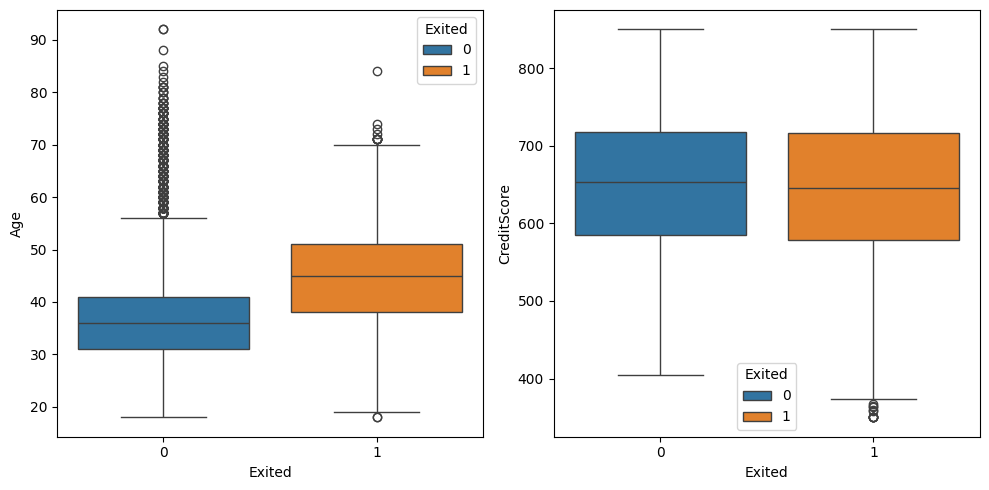

In [ ]:
fig, axes = plt.subplots(
    1,2,
    figsize = (10,5),
    )

sns.boxplot(
    data = df,
    y = 'Age',
    x = 'Exited',
    hue='Exited',
    ax = axes[0],
)

sns.boxplot(
    data = df,
    y = 'CreditScore',
    x = 'Exited',
    hue='Exited',
    ax = axes[1],
)

plt.tight_layout()

# **Ingeniería de características - Feature Engineering**

- Discretización: Numérica a categórica

Ejemplo: Edad

In [ ]:
df['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

# Churn General

In [ ]:
df['Exited'].unique()

array([1, 0])

In [ ]:
df['Exited'].sum()

np.int64(2037)

In [ ]:
len(df)

10000

In [ ]:
df['Exited'].sum()/len(df)*100

np.float64(20.369999999999997)

In [ ]:
probabilidad_general = df['Exited'].mean()*100
probabilidad_general

np.float64(20.369999999999997)

# Discretización

In [ ]:
# Joven 18 a 28 años, adulto > 28

#Función anónima
df['flag_joven_adulto'] = df['Age'].apply(
    lambda edad: 'Joven' if isinstance(edad, int) and 18 <= edad <= 28
      else ('Adulto' if isinstance(edad, int) and edad > 28
              else ('No Valido' if isinstance(edad, int)
                else 'Valor no valido'))
)

df[['Age','flag_joven_adulto']].sample(10)

,Age,flag_joven_adulto
3076,43,Adulto
9508,26,Joven
8905,36,Adulto
3580,41,Adulto
196,32,Adulto
6616,33,Adulto
6905,35,Adulto
6847,30,Adulto
4596,38,Adulto
3246,57,Adulto


In [ ]:
a = 2
b = 3

print(a + b)

5


In [ ]:
def sumar(a,b):
  result = a + b
  # print(result)
  return result

In [ ]:
suma1 = sumar(1,2)
suma1

3

In [ ]:
suma1

3

In [ ]:
a = int(input('Ingrese un número:'))
b = int(input('Ingrese un número:'))
print("El resultado de sumar los dos números es: ",sumar(a,b))

Ingrese un número:5583
Ingrese un número:3425
El resultado de sumar los dos números es:  9008


In [ ]:
#definición Textual
def variable_joven_adulto(edad):
  if type(edad)== int:
    if 18 <= edad <= 28:
      return 'Joven'
    elif edad > 28:
      return 'Adulto'
    else:
      return 'No Valido'
  else:
    return 'Valor no valido'

In [ ]:
variable_joven_adulto(15)

'No Valido'

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df['flag_joven_adulto']= df['Age'].apply(variable_joven_adulto)

df[['Age','flag_joven_adulto']].sample(10)

df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,flag_joven_adulto
9593,9594,15772216,Henry,738,France,Female,67,1,130652.52,1,0,1,22762.23,0,Adulto
1004,1005,15723685,Ekechukwu,601,Germany,Female,26,7,105514.69,2,1,0,50070.59,0,Joven
2769,2770,15730433,Nakayama,580,Germany,Female,38,1,128218.47,1,1,0,125953.83,1,Adulto
5648,5649,15600174,Walton,525,France,Male,35,7,165358.77,1,0,1,94738.54,0,Adulto
6574,6575,15661290,Hightower,785,Germany,Female,38,9,107199.75,1,0,0,146398.51,0,Adulto
7843,7844,15766288,Ikechukwu,586,Germany,Female,36,5,103700.69,1,1,0,194072.56,1,Adulto
508,509,15773890,Okechukwu,733,France,Male,22,5,0.00,2,1,1,117202.19,0,Joven
2431,2432,15782247,Yeh,540,France,Male,22,4,0.00,3,1,1,186233.26,1,Joven
7909,7910,15570931,Grant,620,France,Male,61,5,0.00,1,0,0,31641.52,1,Adulto
5449,5450,15592028,Roberts,549,France,Female,46,7,0.00,1,1,1,109057.56,0,Adulto


In [ ]:
df['flag_joven_adulto'].value_counts()

flag_joven_adulto
Adulto    8707
Joven     1293
Name: count, dtype: int64

In [ ]:
df.groupby('flag_joven_adulto')['Exited'].sum()

flag_joven_adulto
Adulto    1941
Joven       96
Name: Exited, dtype: int64

In [ ]:
df.groupby('flag_joven_adulto')['Exited'].mean()*100

flag_joven_adulto
Adulto    22.292408
Joven      7.424594
Name: Exited, dtype: float64

In [ ]:
generation_ranges = {
    'Greatest Generation' : (1900,1924),
    'Silent Generation' : (1925,1945),
    'Baby Boomer' : (1946,1964),
    'Generation X' : (1965,1980),
    'Millennials' : (1981,1996),
    'Generation Z' : (1997,2012),
    'Generation Alfa':(2013,2024)
}

In [ ]:
generation_ranges.items()

dict_items([('Greatest Generation', (1900, 1924)), ('Silent Generation', (1925, 1945)), ('Baby Boomer', (1946, 1964)), ('Generation X', (1965, 1980)), ('Millennials', (1981, 1996)), ('Generation Z', (1997, 2012)), ('Generation Alfa', (2013, 2024))])

In [ ]:
from datetime import datetime

In [ ]:
datetime.now().year

2025

In [ ]:
lambda age, ranges:
   (lambda current_year, birth_year:
      next((generation for generation, (start_year, end_year) in ranges.items() if start_year <= birth_year <= end_year), 'Unknown'))(datetime.now().year, datetime.now().year - age)

In [ ]:
def categorize_generation(age, ranges):
  current_year = datetime.now().year
  birth_year = current_year - age

  for generation, (start_year, end_year) in ranges.items():
    if start_year <= birth_year <= end_year:
      return generation
  return 'Unknown'

In [ ]:
categorize_generation(105,generation_ranges)

'Greatest Generation'

In [ ]:
def categorize_generation_2(age):
  generation_ranges = {
    'Greatest Generation' : (1900,1924),
    'Silent Generation' : (1925,1945),
    'Baby Boomer' : (1946,1964),
    'Generation X' : (1965,1980),
    'Millennials' : (1981,1996),
    'Generation Z' : (1997,2012),
    'Generation Alfa':(2013,2024)
  }

  current_year = datetime.now().year
  birth_year = current_year - age

  for generation, (start_year, end_year) in generation_ranges.items():
    if start_year <= birth_year <= end_year:
      return generation
  return 'Unknown'

In [ ]:
categorize_generation_2(105)

'Greatest Generation'

In [ ]:
# df['Generation'] = df['Age'].apply(lambda x: categorize_generation(x,generation_ranges) )
df['Generation'] = df['Age'].apply(categorize_generation_2)

df[['Age','Generation']].head(10)

,Age,Generation
0,42,Millennials
1,41,Millennials
2,42,Millennials
3,39,Millennials
4,43,Millennials
5,44,Millennials
6,50,Generation X
7,29,Millennials
8,44,Millennials
9,27,Generation Z


In [ ]:
datetime.now().year

2024

In [ ]:
df['Generation'].value_counts().sort_index()

,count
Generation,
Baby Boomer,449
Generation X,1876
Generation Z,1293
Millennials,6367
Silent Generation,15


In [ ]:
df.groupby('Generation')['Exited'].sum().sort_index()

,Exited
Generation,
Baby Boomer,114
Generation X,929
Generation Z,96
Millennials,897
Silent Generation,1


In [ ]:
df.groupby('Generation')['Exited'].mean().sort_index()*100

,Exited
Generation,
Baby Boomer,25.389755
Generation X,49.520256
Generation Z,7.424594
Millennials,14.088268
Silent Generation,6.666667


In [ ]:
df.groupby('Generation').agg({'Age':['min','max'],'Exited':'mean'})

Age        Exited
                  min max      mean
Generation                         
Baby Boomer        61  79  0.253898
Generation X       45  60  0.495203
Generation Z       18  28  0.074246
Millennials        29  44  0.140883
Silent Generation  80  92  0.066667

<Axes: xlabel='count', ylabel='Generation'>

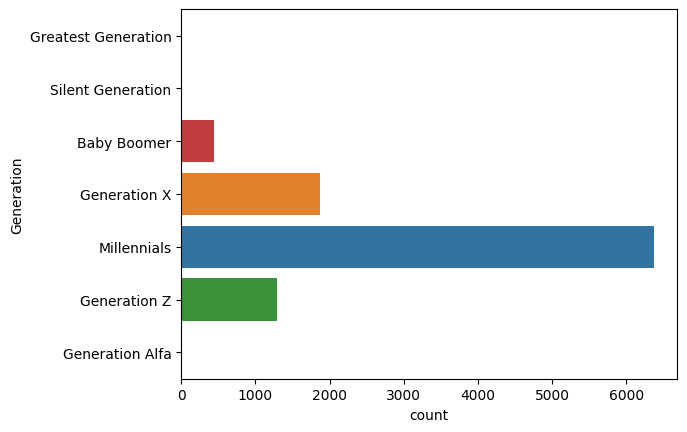

In [ ]:
sns.countplot(
    data = df,
    y = 'Generation',
    hue = 'Generation',
    order = list(generation_ranges.keys())
)

<Axes: ylabel='Generation'>

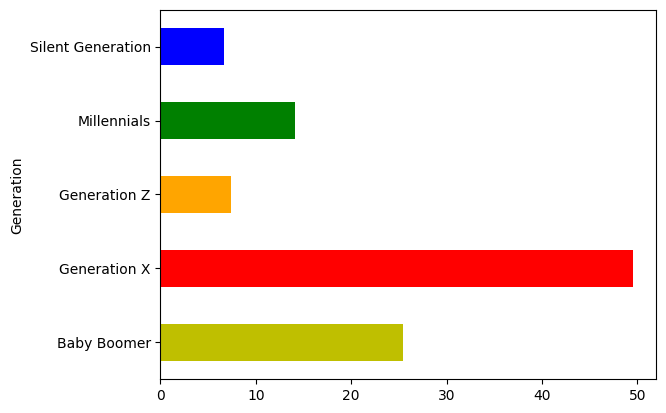

In [ ]:
colors = ['y','red', 'orange', 'green', 'blue', 'purple']


(df.groupby('Generation')['Exited'].mean().sort_index()*100).plot(kind= 'barh',color=colors)

In [ ]:
palette = {
    'Greatest Generation': '#1f77b4',
    'Silent Generation': '#ff7f0e',
    'Baby Boomer': '#2ca02c',
    'Generation X': '#d62728',
    'Millennials': '#9467bd',
    'Generation Z': '#8c564b'
}

In [ ]:
df.groupby('Generation',as_index=False)['Exited'].mean()

,Generation,Exited
0,Baby Boomer,0.253898
1,Generation X,0.495203
2,Generation Z,0.074246
3,Millennials,0.140883
4,Silent Generation,0.066667


In [ ]:
churn = (df.groupby('Generation')['Exited'].mean().sort_index()).reset_index()
churn

,Generation,Exited
0,Baby Boomer,0.253898
1,Generation X,0.495203
2,Generation Z,0.074246
3,Millennials,0.140883
4,Silent Generation,0.066667


In [ ]:
customers = df['Generation'].value_counts().sort_index().reset_index()
customers

,Generation,count
0,Baby Boomer,449
1,Generation X,1876
2,Generation Z,1293
3,Millennials,6367
4,Silent Generation,15


In [ ]:
merge_df = churn.merge(customers,on='Generation')
merge_df

,Generation,Exited,count
0,Baby Boomer,0.253898,449
1,Generation X,0.495203,1876
2,Generation Z,0.074246,1293
3,Millennials,0.140883,6367
4,Silent Generation,0.066667,15


In [ ]:
merge_df = churn.merge(customers,on='Generation')
merge_df['clientes_churn'] = merge_df['Exited']*merge_df['count']
merge_df['impacto_usd'] = merge_df['Exited']*merge_df['count']*1000
merge_df.sort_values('impacto_usd')

,Generation,Exited,count,clientes_churn,impacto_usd
4,Silent Generation,0.066667,15,1.0,1000.0
2,Generation Z,0.074246,1293,96.0,96000.0
0,Baby Boomer,0.253898,449,114.0,114000.0
3,Millennials,0.140883,6367,897.0,897000.0
1,Generation X,0.495203,1876,929.0,929000.0


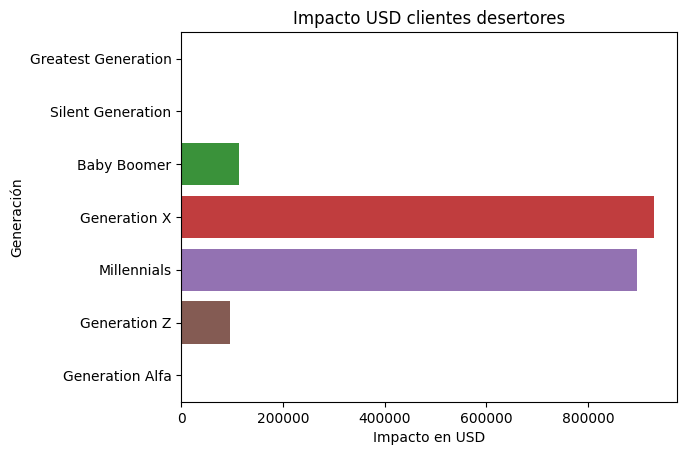

In [ ]:
sns.barplot(
    data=merge_df,
    x='impacto_usd',
    y='Generation',
    hue = 'Generation',
    palette=palette,
    order = list(generation_ranges.keys())
)

plt.ylabel('Generación')
plt.xlabel('Impacto en USD')
plt.title('Impacto USD clientes desertores')
plt.show()

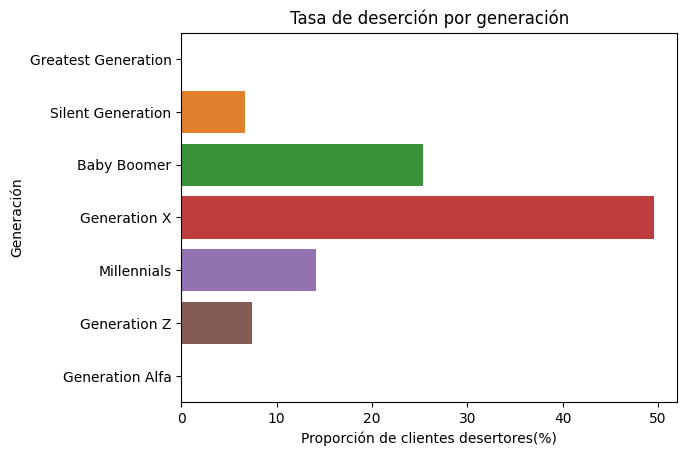

In [ ]:
prob_gen = (df.groupby('Generation')['Exited'].mean().sort_index()*100).reset_index()
gen_order = list(generation_ranges.keys())

sns.barplot(
    data=prob_gen,
    y='Generation',
    x='Exited',
    hue = 'Generation',
    palette=palette,
    order = gen_order
)

plt.title('Tasa de deserción por generación')
plt.ylabel('Generación')
plt.xlabel('Proporción de clientes desertores(%)')
plt.show()

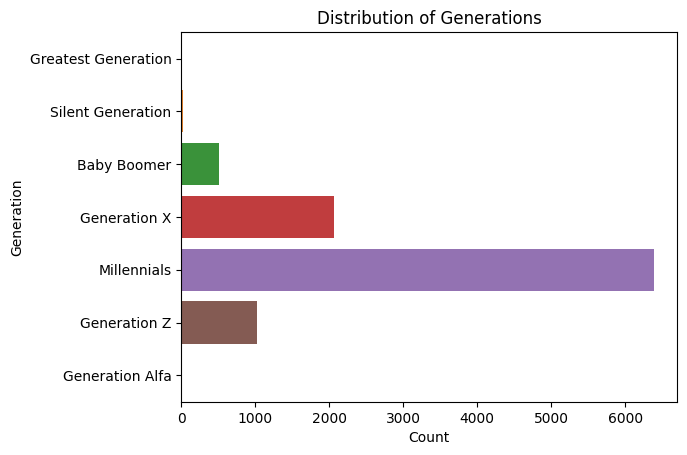

In [ ]:
generation_order = list(generation_ranges.keys())

# Gráfica de conteo de generaciones
sns.countplot(data=df, y='Generation', hue='Generation', order=generation_order, palette=palette)
plt.xlabel('Count')
plt.ylabel('Generation')
plt.title('Distribution of Generations')
plt.show()

# Análisis de probabilidad de churn por sexo

In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [ ]:
df.groupby('Gender')['Exited'].mean()

,Exited
Gender,
Female,0.250715
Male,0.164559


In [ ]:
df.groupby(['Gender','flag_joven_adulto'])['Exited'].mean()

Gender  flag_joven_adulto
Female  Adulto               0.273394
        Joven                0.098472
Male    Adulto               0.180938
        Joven                0.053977
Name: Exited, dtype: float64

In [ ]:
df.groupby(['Gender','flag_joven_adulto'])['Exited'].size()

Gender  flag_joven_adulto
Female  Adulto               3954
        Joven                 589
Male    Adulto               4753
        Joven                 704
Name: Exited, dtype: int64

In [ ]:
df.groupby(['Gender','Generation'])['Exited'].size()

Gender  Generation       
Female  Baby Boomer           207
        Generation X          936
        Generation Z          589
        Millennials          2805
        Silent Generation       6
Male    Baby Boomer           242
        Generation X          940
        Generation Z          704
        Millennials          3562
        Silent Generation       9
Name: Exited, dtype: int64

In [ ]:
df.groupby(['Gender','Generation'])['Exited'].mean()

Gender  Generation       
Female  Baby Boomer          0.304348
        Generation X         0.558761
        Generation Z         0.098472
        Millennials          0.176114
        Silent Generation    0.166667
Male    Baby Boomer          0.210744
        Generation X         0.431915
        Generation Z         0.053977
        Millennials          0.113139
        Silent Generation    0.000000
Name: Exited, dtype: float64

<Axes: ylabel='Gender,Generation'>

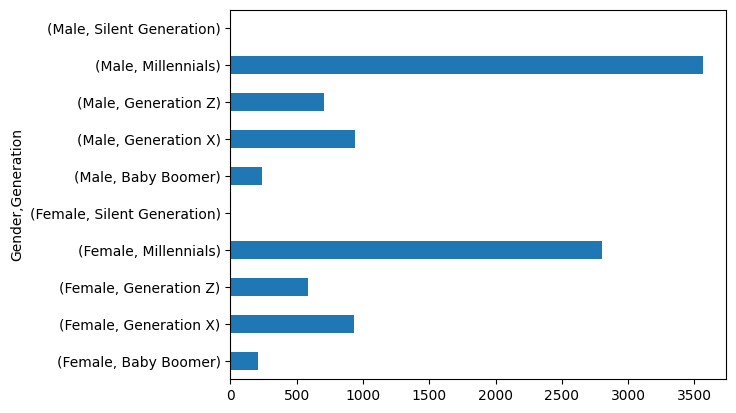

In [ ]:
df.groupby(['Gender','Generation'])['Exited'].size().plot(kind='barh')

<Axes: ylabel='Gender,Generation'>

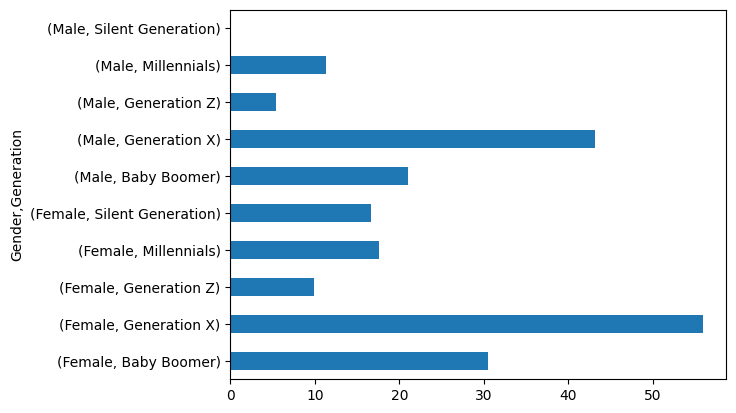

In [ ]:
(df.groupby(['Gender','Generation'])['Exited'].mean()*100).plot(kind='barh')

<Axes: ylabel='Geography'>

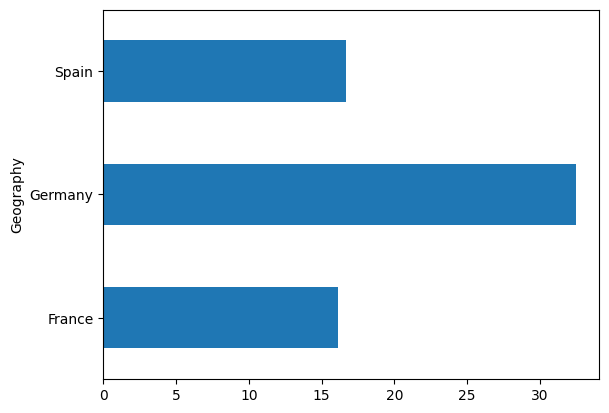

In [ ]:
(df.groupby(['Geography'])['Exited'].mean()*100).plot(kind='barh')

<Axes: ylabel='Gender,Geography,Generation'>

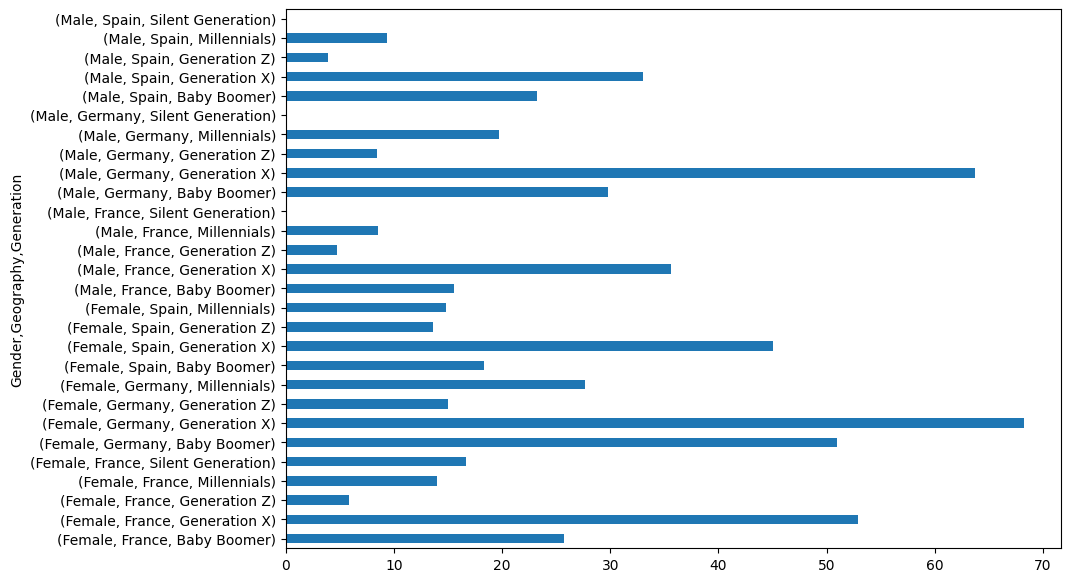

In [ ]:
(df.groupby(['Gender','Geography','Generation'])['Exited'].mean()*100).plot(kind='barh', figsize=(10,7))

<Axes: ylabel='Gender,HasCrCard,Geography,Generation'>

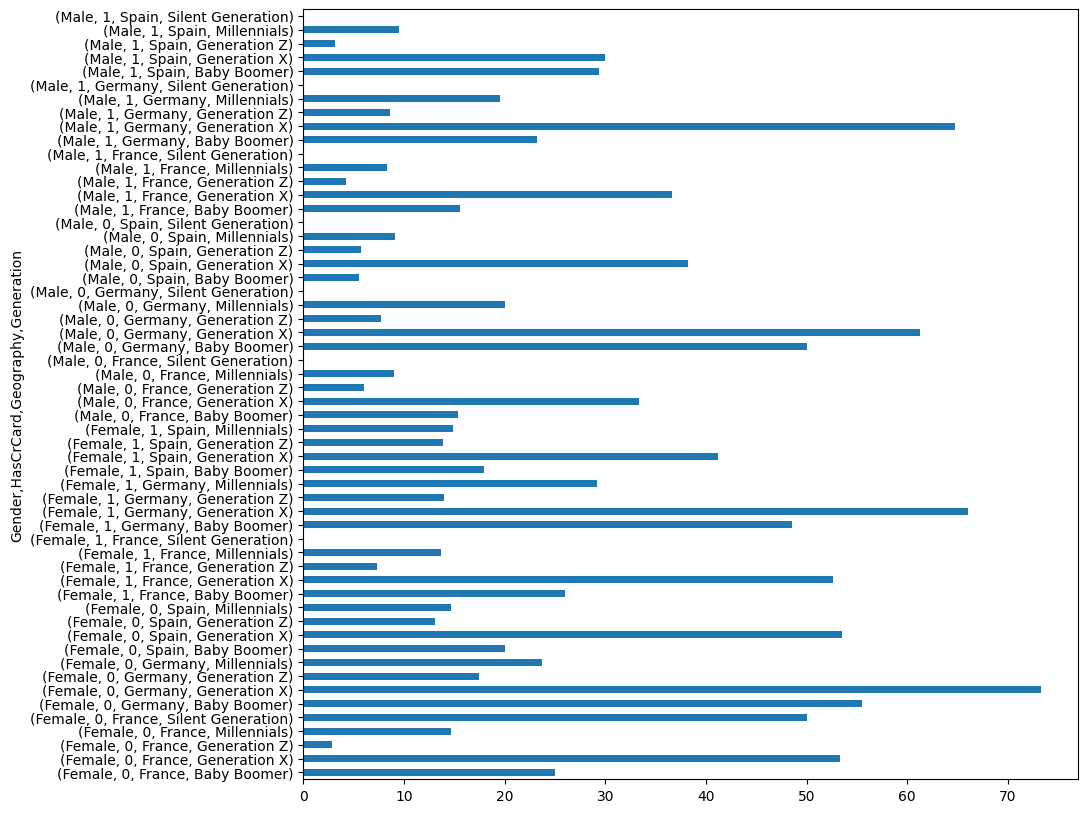

In [ ]:
(df.groupby(['Gender','HasCrCard','Geography','Generation'])['Exited'].mean()*100).plot(kind='barh', figsize=(10,10))

In [ ]:
(df.groupby(['Gender','HasCrCard','Geography','Generation'])['Exited'].mean()).reset_index().sort_values('Exited', ascending= False).head(20)

,Gender,HasCrCard,Geography,Generation,Exited
6,Female,0,Germany,Generation X,0.733333
19,Female,1,Germany,Generation X,0.660377
47,Male,1,Germany,Generation X,0.647668
32,Male,0,Germany,Generation X,0.612500
5,Female,0,Germany,Baby Boomer,0.555556
10,Female,0,Spain,Generation X,0.535211
1,Female,0,France,Generation X,0.532787
14,Female,1,France,Generation X,0.526690
4,Female,0,France,Silent Generation,0.500000
31,Male,0,Germany,Baby Boomer,0.500000


In [ ]:
(df.groupby(['Gender','HasCrCard','Geography','Generation']).agg({'Exited':['mean','count']})).reset_index()

Gender HasCrCard Geography         Generation    Exited      
                                                       mean count
0   Female         0    France        Baby Boomer  0.250000    32
1   Female         0    France       Generation X  0.532787   122
2   Female         0    France       Generation Z  0.028571   105
3   Female         0    France        Millennials  0.146919   422
4   Female         0    France  Silent Generation  0.500000     2
5   Female         0   Germany        Baby Boomer  0.555556    18
6   Female         0   Germany       Generation X  0.733333    90
7   Female         0   Germany       Generation Z  0.175000    40
8   Female         0   Germany        Millennials  0.237624   202
9   Female         0     Spain        Baby Boomer  0.200000    10
10  Female         0     Spain       Generation X  0.535211    71
11  Female         0     Spain       Generation Z  0.130435    46
12  Female         0     Spain        Millennials  0.146597   191
13  Female         1    France        Baby Boomer  0.260274    73
14  Female         1    France       Generation X  0.526690   281
15  Female         1    France       Generation Z  0.073529   204
16  Female         1    France        Millennials  0.136811  1016
17  Female         1    France  Silent Generation  0.000000     4
18  Female         1   Germany        Baby Boomer  0.485714    35
19  Female         1   Germany       Generation X  0.660377   212
20  Female         1   Germany       Generation Z  0.139785    93
21  Female         1   Germany        Millennials  0.292247   503
22  Female         1     Spain        Baby Boomer  0.179487    39
23  Female         1     Spain       Generation X  0.412500   160
24  Female         1     Spain       Generation Z  0.138614   101
25  Female         1     Spain        Millennials  0.148620   471
26    Male         0    France        Baby Boomer  0.153846    39
27    Male         0    France       Generation X  0.333333   129
28    Male         0    France       Generation Z  0.060000   100
29    Male         0    France        Millennials  0.090559   519
30    Male         0    France  Silent Generation  0.000000     1
31    Male         0   Germany        Baby Boomer  0.500000    14
32    Male         0   Germany       Generation X  0.612500    80
33    Male         0   Germany       Generation Z  0.076923    39
34    Male         0   Germany        Millennials  0.200855   234
35    Male         0   Germany  Silent Generation  0.000000     1
36    Male         0     Spain        Baby Boomer  0.055556    18
37    Male         0     Spain       Generation X  0.382716    81
38    Male         0     Spain       Generation Z  0.057692    52
39    Male         0     Spain        Millennials  0.090909   286
40    Male         0     Spain  Silent Generation  0.000000     1
41    Male         1    France        Baby Boomer  0.155844    77
42    Male         1    France       Generation X  0.365931   317
43    Male         1    France       Generation Z  0.042146   261
44    Male         1    France        Millennials  0.083397  1307
45    Male         1    France  Silent Generation  0.000000     3
46    Male         1   Germany        Baby Boomer  0.232558    43
47    Male         1   Germany       Generation X  0.647668   193
48    Male         1   Germany       Generation Z  0.086614   127
49    Male         1   Germany        Millennials  0.195540   583
50    Male         1   Germany  Silent Generation  0.000000     2
51    Male         1     Spain        Baby Boomer  0.294118    51
52    Male         1     Spain       Generation X  0.300000   140
53    Male         1     Spain       Generation Z  0.032000   125
54    Male         1     Spain        Millennials  0.094787   633
55    Male         1     Spain  Silent Generation  0.000000     1

# Relación edad y score crediticio

In [ ]:
df.groupby('Generation')['CreditScore'].mean()

,CreditScore
Generation,
Baby Boomer,653.567929
Generation X,646.597548
Generation Z,650.651199
Millennials,651.369248
Silent Generation,683.933333


<Axes: xlabel='CreditScore', ylabel='Generation'>

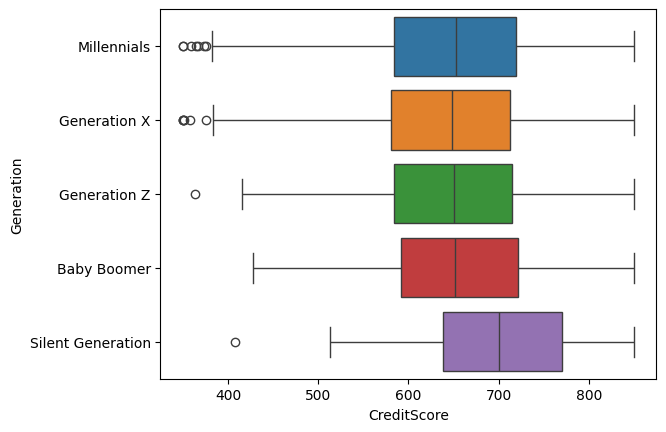

In [ ]:
sns.boxplot(
    data=df,
    x = 'CreditScore',
    y = 'Generation',
    hue = 'Generation'
)